In [3]:
import numpy as np
from matplotlib import pyplot as plt

### Problem 2

<font size = 4 color = black face = "Times New Roman">

$f(x)=sinx$ on the interval $[0,1]$

The maximum error is bounded by
$$\begin{aligned}
&\left\vert \Delta f\left(  x\right)  \right\vert    \leq\frac{\gamma%
}{4 (n+1)  }h^{n+1}\\
&\gamma   =\max\left\vert f^{\left( n+1\right)  }\left(  x\right)
\right\vert, \;h   =\max\left(  x_{i+1}-x_{i}\right)
\end{aligned}$$
    
$$\begin{aligned}
\left\vert f^{\left(  2\right)  }\left(  x\right)  \right\vert  & =\left\vert
-\sin x\right\vert \leq\left\vert -\sin\left(  1.0\right)  \right\vert
=0.841471=M_{2},\\
\left\vert f^{\left(  3\right)  }\left(  x\right)  \right\vert  & =\left\vert
-\cos x\right\vert \leq\left\vert -\cos\left(  0.0\right)  \right\vert
=1.000000=M_{3},\\
\left\vert f^{\left(  4\right)  }\left(  x\right)  \right\vert  & =\left\vert
\sin x\right\vert \leq\left\vert \sin\left(  1.0\right)  \right\vert
=0.841471=M_{4}.
\end{aligned}$$

In [4]:
np.sin(1)

0.8414709848078965

<font size = 4 color = black face = "Times New Roman">
(1)linear Lagrange interpolation has an accuracy of $10^{-6}$$, \left\vert \Delta f_{1}\left(  x\right)  \right\vert<5\times10^{-7}$
$$
{\vert \Delta f_1(x) \vert} \leq \dfrac{{M_2}h^2}{8} \\
 \dfrac{{M_2}h^2}{8} < 5\times10^{-7} \\
 h < \sqrt{\dfrac{8\times 5\times10^{-7}}{M_2}} \approx 0.00218
$$

In [5]:
pow(8*5e-7/np.sin(1), 1/2)

0.0021802707224362035

<font size = 4 color = black face = "Times New Roman">
(2) quadratic Lagrange interpolation has an accuracy of $10^{-6}, \left\vert \Delta {f_2}\left(  x\right)  \right\vert<5\times10^{-7}$
$$
{\vert \Delta f_2(x) \vert} \leq \dfrac{{M_3}h^3}{12} \\
 \dfrac{{M_3}h^3}{12} < 5\times10^{-7} \\
 h < \sqrt[3]{\dfrac{12\times 5\times10^{-7}}{M_3}} \approx 0.01817
$$

In [6]:
pow(12*5e-7/1., 1/3)

0.0181712059283214

<font size = 4 color = black face = "Times New Roman">
(3)cubicLagrange interpolation has an accuracy of $10^{-6}$$, \left\vert \Delta f_{3}\left(  x\right)  \right\vert<5\times10^{-7}$
$$
{\vert \Delta f_3(x) \vert} \leq \dfrac{{M_4}h^4}{16} \\
 \dfrac{{M_4}h^4}{16} < 5\times10^{-7} \\
 h < \sqrt[4]{\dfrac{16\times 5\times10^{-7}}{M_4}} \approx 0.05553
$$

In [7]:
pow(16*5e-7/np.sin(1), 1/4)

0.0555280868148207

### Problem 7

<font size = 4 color = black face = "Times New Roman">Since in this problem we have to do the differentiation for separated data. Firstly, we have to do the interpolation for the data. Here we choose Newton's ploynomial to do this. In this problem, the values for year is so large that they may make the interpolation more difficult. As a result, we use the **year - average(year)** instead. This is just a translation and won't change any character of the data.

| Year | Population (millions) |
| ---- | ----|
| 1960 | 17.9|
| 1970 | 21.3|
| 1980 | 24.6|
| 1990 | 27.8|
| 2000 | 30.8|
| 2010 | 34.1|

In [8]:
year = np.arange(1960,2020,10)
year_norm = year - year.mean() # Use year-average(year) instead.
population = np.array([17.9, 21.3, 24.6, 27.8, 30.8, 34.1])
year_norm

array([-25., -15.,  -5.,   5.,  15.,  25.])

<font size = 4 color = black face = "Times New Roman"> Now, we do the interpolation for these data by Newton interpolation.

In [9]:
def newton_coeff(xData, yData): # Use the data points to determine the coefficients of Newton polynomial.
    coeff = yData.copy() # Set the initial values of the coefficients to be the value of yData, then change them gradually.
    m = len(xData) # m is the number of data points. We have n_th order Newton polynomial, m = n + 1.
    for k in range(1,m): # k is the column in the coefficient table.
        for i in range(k,m): # i stands for the row is the coefficient table.
            coeff[i] = (coeff[i] - coeff[k-1])/(xData[i] - xData[k-1])
    # Use interation to renew the data in coeff so that we can compute the coefficient in the next column until all the value are what we want
    return coeff 

def newton_eval(coeff,xData, x): # Use the coefficient computed to contstruct the polynomial and calculate the value at x.
    m = len(xData)
    n = m - 1
    p = coeff[n] # coeff[0] is just f0.
    for k in range(1,m):
        p = coeff[n-k] + (x - xData[n-k])*p
    return p

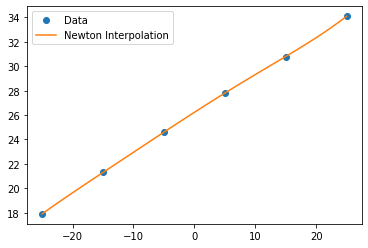

In [10]:
coeff =  newton_coeff(year_norm, population)   
x = np.linspace(min(year_norm), max(year_norm), 100, endpoint = True)
y = newton_eval(coeff, year_norm, x)
plt.plot(year_norm, population,'o')
plt.plot(x,y)
plt.legend(['Data','Newton Interpolation'])
plt.show()

<font size = 4 color = black face = "Times New Roman">(a) We define a function to do the backward formula
$$
\dfrac{df(x)}{dx}=\dfrac{f(x)-f(x-h)}{h}
$$

In [11]:
def backward(f, x, h): # f is the function of x, h the step size, x is where the differentation is calculated.
    dx = (f(x_a) - f(x_a-h))/h
    return dx

In [12]:
def p_5(x):
    return newton_eval(coeff, year_norm, x)

x_a = 25. # After the translation 25 corresponds to 2010
h_set = [0.1, 0.01, 0.001, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]
for h in h_set:
    print(backward(p_5, x_a,h))

0.38970436667248975
0.39057004374214443
0.39065700043749985
0.3906657000385394
0.3906665703823364
0.39066665635800746
0.3906666989905716
0.3906670542619395
0.3906635015482607
0.3906563961209031


<font size = 4 color = black face = "Times New Roman">Since when h is too small substracitve cancellation may occur, the rate of population growth in 2010 should be around 39.06667%

<font size = 4 color = black face = "Times New Roman">(b) Combine the result from a and apply the central point formula
$$
\dfrac{df(x)}{dx}=\dfrac{f(x+h/2)-f(x-h/2)}{h}
$$

In [13]:
x_b = 25. # 2010 corresponds to 25, 2020 corresponds t0 35
h = 20
f_2020 = backward(p_5,x_a,1e-7)*h+p_5(x_b-h/2) # Step size 1e-7 is chosen from (a)
print('The poplulation in 2020 should be {:2.1f}(million)'.format(f_2020))

The poplulation in 2020 should be 38.6(million)


### Problem 8

<font size = 4 color = black face = "Times New Roman">Firstly, we define the calculation for the approximation of the first order partial derivative for x and y.

In [14]:
def partial_x(f, x, y, h): # f is a funtion of x and y, x and y are the values where the differentiation is calculated, h is the step size.
    p_x = (f(x+h, y) - f(x-h, y))/(2*h)
    return p_x

def partial_y(f, x, y, h): # f is a funtion of x and y, x and y are the values where the differentiation is calculated, h is the step size.
    p_y = (f(x, y+h) - f(x, y-h))/(2*h)
    return p_y

<font size = 4 color = black face = "Times New Roman">Then we use the data given to caculate the partial derivative for a specific funtion.

In [15]:
def f(x,y): # Define the function.
    return (x*y)/(x+y)
h_set =  [0.1, 0.01, 0.001]
x,y = 2,3

In [16]:
print('{:<8}{:<23}{:<23}'.format('h','partial_x','partial_y'))
for h in h_set:  
    p_x = partial_x(f, x, y, h)
    p_y = partial_y(f, x, y, h)
    print('{:<8}{:<23}{:<23}'.format(h, p_x, p_y))


h       partial_x              partial_y              
0.1     0.3601440576230519     0.1600640256102448     
0.01    0.36000144000575274    0.16000064000255554    
0.001   0.3600000144001747     0.16000000640004064    


<font size = 4 color = black face = "Times New Roman">Finally, we calulate the theoretical value by directly doing the partial differentiation.
$$\dfrac{{\partial}f}{{\partial}x} = \dfrac{y(x+y)-xy}{(x+y)}^2 = \dfrac{y^2}{(x+y)^2}$$ 
$$\dfrac{{\partial}f}{{\partial}y} = \dfrac{x(x+y)-xy}{(x+y)}^2 = \dfrac{x^2}{(x+y)^2}$$     
<font size = 4 color = black face> As a result$f_x(2,3) = 0.36$ and $f_y(2,3) = 0.16$.
Compared with the calculated results, for the given h, their results are very close the exact value and the samller the h is , the more accurate the result will be. However, when h becomes much smaller, substractive cancellation may occur.